## July 2021
## Plotting FOXSI-3 data

In [5]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import datetime
import sunpy.coordinates
import glob

DataDir = './DataFOXSI3/'
offset_xy = [0., 0.]
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 62460.
t0 = datetime.datetime(2018,9,7,17,21)
thr_n = 0.
Rsun  = sunpy.coordinates.sun.angular_radius(datetime.datetime(2018,9,7,17,21)).value \
        * (1 + 50000/695700) # This is equivalent to chose a buffer of 50km over the solar photosphere.

Ftarget = {'T1': {'xy':(429.9, 39.5),      'time':(104.6,232.8)},
           'T2': {'xy':(-0.1, 650.7),      'time':(239.9,263.9)},
           'T3': {'xy':(-650.8, 39.6),     'time':(271.0,415.6)},
           'T4': {'xy':(429.8, 39.6), 'time':(419.2,445.5)},
           'T5': {'xy':(550.8, 39.6), 'time':(449.9,494.1)}
          }

def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_di = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_di_E = data_lvl2_di[(np.stack(data_lvl2_di['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_di['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_di['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_di_ET = data_lvl2_di_E[(data_lvl2_di_E['wsmr_time'] > Trange[0]) & 
                                     (data_lvl2_di_E['wsmr_time'] < Trange[1])]
    return data_lvl2_di_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_di = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_di_E = data_lvl2_di[(np.stack(data_lvl2_di['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_di['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_di['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_di_ET = data_lvl2_di_E[(data_lvl2_di_E['wsmr_time'] > Trange[0]) & 
                                     (data_lvl2_di_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_di_ET_noerr = data_lvl2_di_ET[data_lvl2_di_ET['ERROR_FLAG']==0]
    return data_lvl2_di_ET_noerr

def plotdata(FXDX, det, Target):
    Tx, Ty = Ftarget[f'T{Target}']['xy']
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title(f'FOXSI3 - Target {Target} - Det {det}',fontsize=28)
    # FOXSI2 Data
    if len(FXDX['HIT_XY_SOLAR']) != 0:
        ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
                   np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
                   marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((Tx-l/2+mx,Ty-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
    plt.show()
    fig.savefig(f'./images/F3T{Target}D{det}.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

    
def plotdata_all(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title(f'FOXSI3 - All Targets - Det {det}',fontsize=28)
    # FOXSI2 Data
    if len(FXDX['HIT_XY_SOLAR']) != 0:
        ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
                   np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
                   marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    for Target in range(1,6):
        Tx, Ty = Ftarget[f'T{Target}']['xy']
        rect = patches.Rectangle((Tx-l/2+mx,Ty-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
    plt.show()
    fig.savefig(f'./images/F3D{det}_all.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

In [9]:
# Total observation flight (All fligth)
Trange_all = np.array((Ftarget[f'T1']['time'][0],Ftarget[f'T5']['time'][1])) + tlaunch
Erange_all = [5, 10] # Defining Energy range
# Loading FOXSI3 Data - ONLY GOOD DATA - :
# 10-shell
F3D0_all = Good_Data('data_lvl2_d0.sav',Erange_all,Trange_all)
F3D4_all = Good_Data('data_lvl2_d4.sav',Erange_all,Trange_all)
# 7-shell
F3D2_all = Good_Data('data_lvl2_d2.sav',Erange_all,Trange_all)

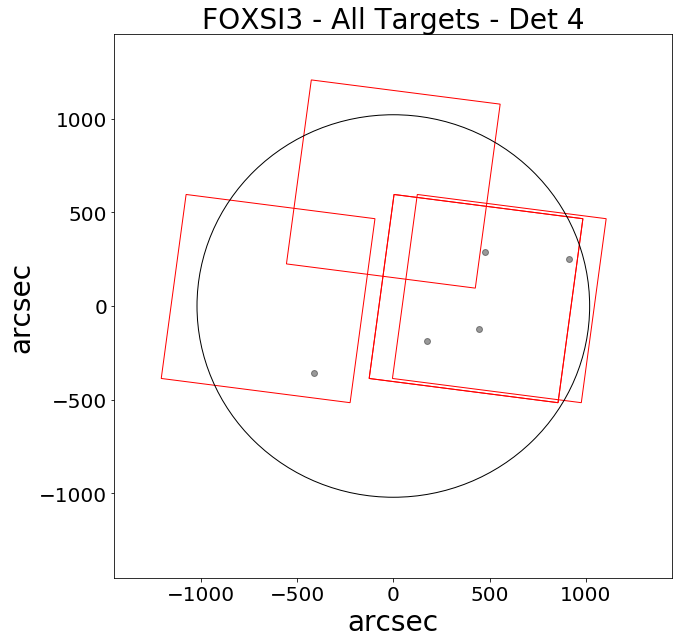

In [56]:
plotdata_all(F3D4_all,4)

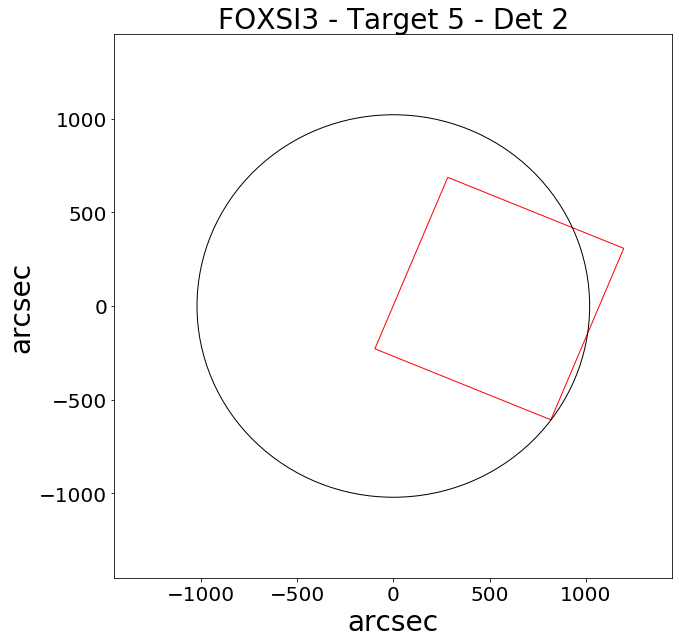

In [23]:
# Defining TARGET:
Target = 5

Trange = np.array(Ftarget[f'T{Target}']['time']) + tlaunch # Defining times:
Erange = [5, 10] # Defining Energy range
#Erange = [3, 25] # Defining Energy range

# Loading FOXSI3 Data - ONLY GOOD DATA - :
# 10-shell
F3D0 = Good_Data('data_lvl2_d0.sav',Erange,Trange)
F3D4 = Good_Data('data_lvl2_d4.sav',Erange,Trange)
# 7-shell
F3D2 = Good_Data('data_lvl2_d2.sav',Erange,Trange)

plotdata(F3D2, 2, Target)

In [10]:
t_i = t0 + datetime.timedelta(seconds=(Ftarget['T1']['time'][0]))
t_f = t0 + datetime.timedelta(seconds=(Ftarget['T5']['time'][1]))
delta_t = t_f - t_i
print(f'Initial observation time: {t_i}')
print(f'Final observation time: {t_f}')
print(f'Observation time: {round(delta_t.seconds/60,2)} minutes')

Initial observation time: 2018-09-07 17:22:44.600000
Final observation time: 2018-09-07 17:29:14.100000
Observation time: 6.48 minutes


**Livetimes**

In [8]:
lt_files = glob.glob('./foxsi3_livetimes/*')
for ltf in lt_files:
    lt = readsav(ltf)
    print(round(lt['ltime']['frac'][0],3))

0.181
0.4
0.279
0.311
0.337


In [18]:
Lambda2S = np.array([2, 5, 5]) 
DeltaT = delta_t.seconds * np.array([0.856, 0.855, 0.854]) 
EA_on = np.array([9.46, 9.51, 10.72]) # REPLACE THESE VALUES
DeltaE = 5
Omega_sun = 3425468.3 # arcsec2 REPLACE for the FOXSI3 value
Omega_Det = 990**2 # needs fine adjustment

In [19]:
Flux2S = (Lambda2S * Omega_sun) / \
         (DeltaT * DeltaE * EA_on * Omega_Det)
Flux2S

array([0.00044381, 0.00110498, 0.0009814 ])

In [22]:
round(Flux2S.max(),5)

0.0011

### Iain's Plot

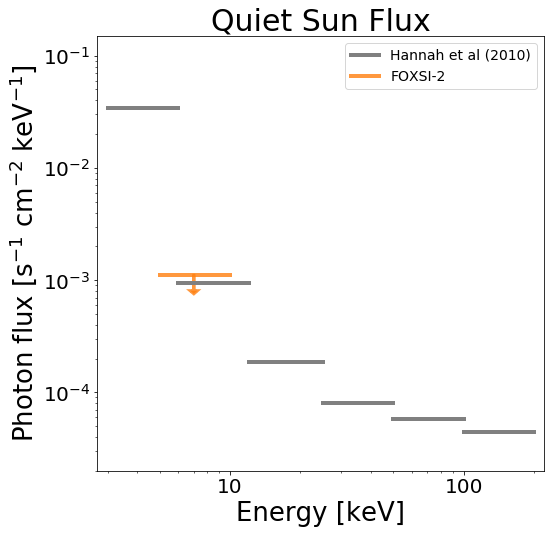

In [36]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(8,8))
# Iain's Data (2010) :
ax.plot([3,6],[340.38e-4,340.38e-4],linewidth=4.0,color='grey')
ax.plot([6,12],[9.5e-4,9.5e-4],linewidth=4.0,color='grey')
ax.plot([12,25],[1.88e-4,1.88e-4],linewidth=4.0,color='grey')
ax.plot([25,50],[0.8e-4,0.8e-4],linewidth=4.0,color='grey')
ax.plot([50,100],[0.58e-4,0.58e-4],linewidth=4.0,color='grey')
ax.plot([100,200],[0.44e-4,0.44e-4],linewidth=4.0,color='grey',label='Hannah et al (2010)')
# Det-6 FOXSI2
ax.plot([5,10],[Flux2S.max(),Flux2S.max()],linewidth=4.0,color='tab:orange',label='FOXSI-2',alpha=0.8) # best
ax.arrow(7, Flux2S.max(), 0, -0.0003,head_width=0.5, head_length=0.00005,alpha=0.8,
         fc='tab:orange', ec='tab:orange',linewidth=3.0)
#ax.plot([6,12],[6.8e-4,6.8e-4],linewidth=4.0,color='tab:blue',label='FOXSI-2 det6 [R=700"]',alpha=0.6) # worst
# ornaments
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlim(2.7,220)
ax.set_ylim(2e-5,0.15)
ax.set_xlabel('Energy [keV]',fontsize=26)
ax.set_ylabel('Photon flux [s$^{-1}$ cm$^{-2}$ keV$^{-1}$]',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('Quiet Sun Flux',fontsize=30)
ax.legend(fontsize=14)
plt.show()
fig.savefig('images/QS_Flux.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

## Spectral analysis
For the entire flight with the three functional Si Det.

In [4]:
# Time of the whole flight:
Trange_All = np.array((Ftarget['T1']['time'][0],Ftarget['T5']['time'][1])) + tlaunch

# Loading ALL FOXSI3 Data - GOOD DATA - :
# 10-shell
F3D0_All = Good_Data('data_lvl2_d0.sav',Erange,Trange_All)
F3D4_All = Good_Data('data_lvl2_d4.sav',Erange,Trange_All)
# 7-shell
F3D2_All = Good_Data('data_lvl2_d2.sav',Erange,Trange_All)

# Reading energy values:
es0 = np.stack(F3D0_All['hit_energy']).T[1]
es2 = np.stack(F3D2_All['hit_energy']).T[1]
es4 = np.stack(F3D4_All['hit_energy']).T[1]
# Concatenate All together:
esAll = np.concatenate((es0, es2, es4), axis=0)

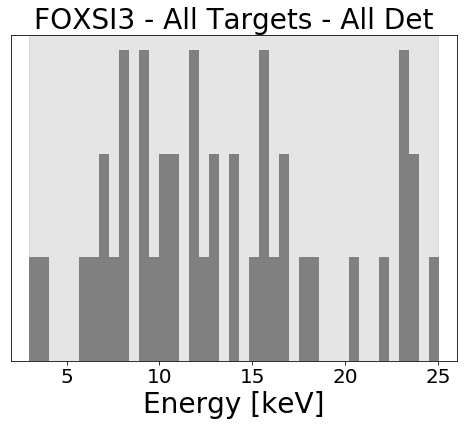

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
# ornaments
ax.set_xlim(2,26)
ax.set_xlabel('Energy [keV]',fontsize=28)
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=20)
ax.set_title('FOXSI3 - All Targets - All Det',fontsize=28)
ax.axvspan(3, 25, alpha=0.2, color='grey')
# FOXSI2 Data
ax.hist(esAll,bins=41,range=Erange,color='grey')
plt.show()
fig.savefig('images/F3_Hist_All.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [6]:
[round(e,1) for e in np.sort(es4)]

[3.1,
 3.9,
 6.0,
 8.2,
 8.2,
 9.2,
 9.2,
 10.4,
 10.5,
 14.0,
 14.2,
 15.6,
 16.1,
 17.7,
 22.0,
 23.2,
 23.5]

In [7]:
F3D2_All['hit_energy']

array([array([11.740619, 10.042346], dtype=float32),
       array([ 1.2036618, 18.222034 ], dtype=float32),
       array([13.760019 ,  9.0642395], dtype=float32),
       array([32.545235, 24.87136 ], dtype=float32),
       array([15.975129, 12.36564 ], dtype=float32),
       array([10.177143,  8.217526], dtype=float32),
       array([2.1837451, 6.7089944], dtype=float32),
       array([9.020856, 6.922174], dtype=float32),
       array([19.083452, 16.460638], dtype=float32),
       array([24.271605, 11.848103], dtype=float32),
       array([29.351257, 13.165363], dtype=float32),
       array([17.865532, 15.432531], dtype=float32),
       array([13.098155, 13.013449], dtype=float32),
       array([16.31041 , 11.764761], dtype=float32),
       array([134.39066  ,   7.3061695], dtype=float32),
       array([28.288853, 23.38272 ], dtype=float32),
       array([26.010275, 20.266027], dtype=float32),
       array([37.26782 , 23.627651], dtype=float32)], dtype=object)

In [8]:
F3D4_All['hit_energy']

array([array([1.6551579, 9.247451 ], dtype=float32),
       array([45.969883, 23.213411], dtype=float32),
       array([ 1.5547514, 16.052843 ], dtype=float32),
       array([12.206111 ,  8.2496195], dtype=float32),
       array([18.637342 , 10.4298725], dtype=float32),
       array([4.9485235, 6.0304894], dtype=float32),
       array([12.099571, 17.675913], dtype=float32),
       array([154.85516  ,   3.0700855], dtype=float32),
       array([147.23326 ,  10.526966], dtype=float32),
       array([31.981726, 21.986586], dtype=float32),
       array([ 1.6419641, 15.567543 ], dtype=float32),
       array([20.6396  ,  8.212826], dtype=float32),
       array([19.329138, 13.960479], dtype=float32),
       array([22.382326 ,  3.9377313], dtype=float32),
       array([94.748764, 23.542637], dtype=float32),
       array([94.07968 ,  9.231011], dtype=float32),
       array([18.624483, 14.181884], dtype=float32)], dtype=object)